In [25]:
import pandas as pd #install pandas on anaconda
import numpy as np
import matplotlib.pyplot as plt

## IO Functions
* open() -> native
* pandas()-> third-party, user-friendly, Excel-like

* Data series -> 1D Data
* Data frames -> 2D Data

In [26]:
# Create dict:
mydataset = {
  'physics': ["HW1", "HW2", "HW3", "HW4", "HW5"],
  'grades': [7.9, 8.2, 7.7, 5.9, 6.4]
}

print(type(mydataset))
print(mydataset['grades'])

<class 'dict'>
[7.9, 8.2, 7.7, 5.9, 6.4]


In [27]:
#Place dict into a pandas DF:
my_subjects = pd.DataFrame(mydataset)

print(type(my_subjects)) #is a pandas object, a DataFrame

print(my_subjects) #note we have the index/label on the left, could be combersome later but helpful to access the elements

<class 'pandas.core.frame.DataFrame'>
  physics  grades
0     HW1     7.9
1     HW2     8.2
2     HW3     7.7
3     HW4     5.9
4     HW5     6.4


## Pandas Series
* A Pandas Series is like a column in a table.
* It is a one-dimensional array holding data of any type.

In [28]:
# Create list for series_1:

series_1 = [1., 10., 20., 30.]

my_series = pd.Series(series_1)

print(my_series)

0     1.0
1    10.0
2    20.0
3    30.0
dtype: float64


In [29]:
#When input a dictionary to Series() we get the one-dimensional array, but the indices/labels are the keys
my_series_subjects = pd.Series(mydataset)
print(my_series_subjects, type(my_series_subjects), len(my_series_subjects))

physics    [HW1, HW2, HW3, HW4, HW5]
grades     [7.9, 8.2, 7.7, 5.9, 6.4]
dtype: object <class 'pandas.core.series.Series'> 2


## Labels
* If nothing else is specified, the values are labeled with their index number.

* The first value has index 0, the second value has index 1, etc.

* This label can be used to access a specified value.

In [30]:
print(my_series[2])
print(my_series_subjects[1])

20.0
[7.9, 8.2, 7.7, 5.9, 6.4]


/tmp/ipykernel_20941/3875175673.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(my_series_subjects[1])


In [31]:
#Create labels
my_series = pd.Series(series_1, index = ["one", "ten", "twenty", "thirty"])
print(my_series)

one        1.0
ten       10.0
twenty    20.0
thirty    30.0
dtype: float64


In [32]:
#Create labels
my_series_subjects = pd.Series(mydataset, index = ["phys", "grades"])
print(my_series_subjects)

phys                            NaN
grades    [7.9, 8.2, 7.7, 5.9, 6.4]
dtype: object


In [33]:
print(my_series_subjects["grades"])

[7.9, 8.2, 7.7, 5.9, 6.4]


# Pandas DataFrames

In [34]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df) 

   calories  duration
0       420        50
1       380        40
2       390        45


In [35]:
#Accessing a row, use the function loc

print(df.loc[0], type(df.loc[0])) #use the row index/label
#it returns a Panda Series

calories    420
duration     50
Name: 0, dtype: int64 <class 'pandas.core.series.Series'>


In [36]:
#Accessing more rows

print(df.loc[[0,1]], type(df.loc[[0,1]])) #use the row indeces/labels
#it returns a Panda DataFrame

   calories  duration
0       420        50
1       380        40 <class 'pandas.core.frame.DataFrame'>


## Named indexes

In [37]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df) 

      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [38]:
#refer to the named index:
print(df.loc[["day2", "day1"]])

      calories  duration
day2       380        40
day1       420        50


## Load files into a DataFrame

In [39]:
df = pd.read_csv('/home/prostofsound/jnotebooks/COMP I/Notes/data/file_1.csv') #if the file contains strings and spaces, 
#also call the module sep to specify the separator 
#So, cat the file before reading!!

print(df) #the file is being interpreted as a one column file, which is wrong

   vector_ones   vector_tens   vector_twenties
0          0.0          10.0              20.0
1          1.0          11.0              21.0
2          2.0          12.0              22.0
3          3.0          13.0              23.0
4          4.0          14.0              24.0
5          5.0          15.0              25.0
6          6.0          16.0              26.0
7          7.0          17.0              27.0
8          8.0          18.0              28.0
9          9.0          19.0              29.0


In [40]:
df = pd.read_csv('/home/prostofsound/jnotebooks/COMP I/Notes/data/file_1.csv', sep = ",")

print(df)

   vector_ones   vector_tens   vector_twenties
0          0.0          10.0              20.0
1          1.0          11.0              21.0
2          2.0          12.0              22.0
3          3.0          13.0              23.0
4          4.0          14.0              24.0
5          5.0          15.0              25.0
6          6.0          16.0              26.0
7          7.0          17.0              27.0
8          8.0          18.0              28.0
9          9.0          19.0              29.0


In [41]:
print(df.loc[5])

print(df[" vector_tens"])

print(df[" vector_tens"][6]) #we use the index/label, not the position as with arrays/lists

vector_ones          5.0
 vector_tens        15.0
 vector_twenties    25.0
Name: 5, dtype: float64
0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6    16.0
7    17.0
8    18.0
9    19.0
Name:  vector_tens, dtype: float64
16.0


## Excercise: Reading simulation data of a cloud embedded in a wind, with Pandas

In [42]:
# First we need to read the data and place it into a pd DF

data_wc = pd.read_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/data_wind_cloud.dat", sep = "\s+") #\s+ since the spacing between elements is one space or more

print(data_wc)

print(type(data_wc)) #this dataframe file always have an index on the left

         Time     Mass1     FluxH      FluxE
0    0.000000  61.18026  8.262365   8.262365
1    0.099800  61.18028  8.262365   8.262365
2    0.199956  61.18033  8.262365   8.262365
3    0.299681  61.18041  7.561459   8.262365
4    0.399916  61.18043  7.927189   8.262365
..        ...       ...       ...        ...
96   9.599985  23.29446  8.262365  10.585580
97   9.699971  20.33465  8.262365  11.147210
98   9.799818  17.66679  8.262365  12.601620
99   9.899956  15.14736  8.262365  12.675020
100  9.999821  12.79309  8.262365  12.691090

[101 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [43]:
# Get the data from each column into arrays:

times = np.array(data_wc["Time"])
massc = np.array(data_wc["Mass1"])
fluxh = np.array(data_wc["FluxH"])
fluxe = np.array(data_wc["FluxE"])

print(times)
print(type(times))
#print(fluxe)

[0.         0.09980016 0.1999556  0.299681   0.399916   0.4997105
 0.5997653  0.6999839  0.7998617  0.8998577  0.9998068  1.099872
 1.199948   1.299926   1.399905   1.499916   1.599893   1.699951
 1.799934   1.89991    1.999953   2.099911   2.19989    2.299931
 2.399924   2.499999   2.599998   2.699871   2.799929   2.899973
 2.999907   3.099908   3.199866   3.29998    3.399886   3.499975
 3.599933   3.699991   3.799898   3.899875   3.999934   4.099867
 4.199992   4.299838   4.399916   4.4999     4.599816   4.699879
 4.799859   4.899898   4.999963   5.099815   5.199829   5.299736
 5.399895   5.499949   5.599699   5.699848   5.799772   5.899714
 5.999899   6.099827   6.199733   6.299713   6.399739   6.499841
 6.599835   6.699715   6.799985   6.899997   6.999752   7.09991
 7.199678   7.299979   7.39987    7.499752   7.599726   7.699977
 7.799823   7.899762   7.999789   8.099956   8.199907   8.299865
 8.39968    8.499951   8.599983   8.699736   8.799808   8.899926
 8.999903   9.099972   9.

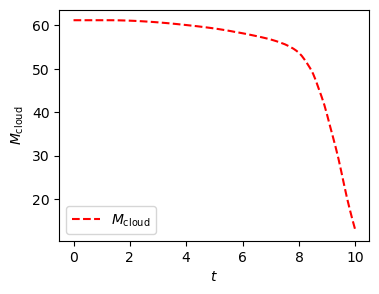

In [44]:
#Plotting mass vs time
plt.figure(figsize=(4,3))

plt.plot(times, massc, linestyle = "--", color = "red",label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"$M_{\rm cloud}$")

plt.show()

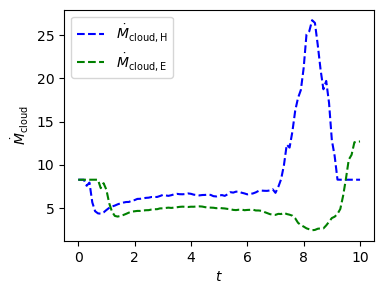

In [45]:
plt.figure(figsize=(4,3))

plt.plot(times, fluxh, linestyle = "--", color = "blue",\
         label = r"$\dot{M}_{\rm cloud, H}$")
plt.plot(times, fluxe, linestyle = "--", color = "green",\
         label = r"$\dot{M}_{\rm cloud, E}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"${\dot M}_{\rm cloud}$")

plt.show()

## Using our own IO functions

In [46]:
def ioread(filename):
    '''
    This is a function that reads a data file using Pandas and converts the columns of the file into arrays,
    so we can access them easier by indexing.
    It is also important to mention, this function assumes the separation between the elements to be more than two spaces.
    Input: "filename" (str, this should be the path to the file)
    Output: numpy arrays
    Author: PROST
    Data: 26/02/2025
    '''
    #cat the file before working with it
    file1 = pd.read_csv("filename", sep = "\s+") #file1 is a DataFrame, so we can access the columns by the headers

    column1 = np.array(file1["Header1"])
    column2 = np.array(file1["Header2"])
    column3 = np.array(file1["Header3"])
    column4 = np.array(file1["Header4"]) #add as many arrays as columns in the file

    return colum1, column2, column3, column4
    
    

In [47]:
# Start our I/O function

def io_data_wc(filename):
    """
    This is a function that reads in the data file for a cloud inside a wind chamber
    and returns numpy arrays with the data in each
    column. 
    Input: filename (str)
    Outputs: numpy arrays
    Author: WEBB
    Date: 06.03.2024
    """
    
    # Create a pandas DF:
    data_wc = pd.read_csv(filename, sep = "\s+")
    
    # Get the data from each column into arrays:
    times = np.array(data_wc["Time"])
    massc = np.array(data_wc["Mass1"])
    fluxh = np.array(data_wc["FluxH"])
    fluxe = np.array(data_wc["FluxE"])

    return times, massc, fluxh, fluxe

In [48]:
# Set the filename:

filename1 = "/home/prostofsound/jnotebooks/COMP I/Notes/data/data_wind_cloud.dat"

# Call your function to open the file and get the data into a tuple

t, m, fh, fe = io_data_wc(filename1)

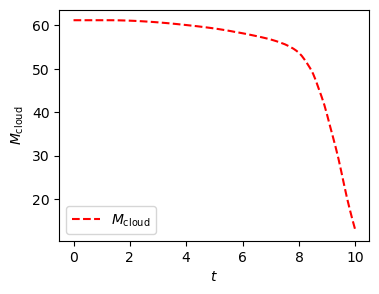

In [49]:
plt.figure(figsize=(4,3))

plt.plot(t, m, linestyle = "--", color = "red",\
         label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"$M_{\rm cloud}$")

plt.show()

## Basic Data Analysis
Suppose now that we want to work with the data, not just see them in plots, but actually use them for calculations.

To achieve this Python offers a large range of functions, e.g. say we want to multiply the array of times by 1 minute in seconds, and then save this in a new file jointly with the cloud mass.

In [50]:
# Conversions to SI
# Multiple the time vector by 60 seconds = 1 min.

t_new = t*60. # time in seconds

# Multiply the mass vector by 1./1000.

m_new = m/1000. # mass in kg

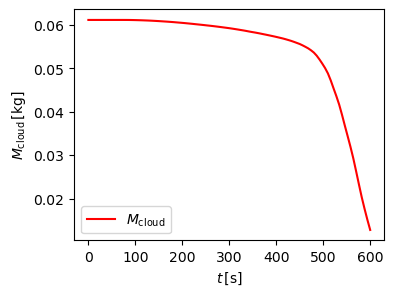

In [51]:
#plot in SI units
plt.figure(figsize=(4,3))

plt.plot(t_new, m_new, linestyle = "-", color = "red",\
         label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$M_{\rm cloud}\,\rm [kg]$")

plt.show()

In [52]:
#Now, to save this new date we use another dataframe
# 1. Create a dict

new_dict = {"time_s": t_new, "mass_kg": m_new}

# 2. Converting our dict into a DF

new_df = pd.DataFrame(new_dict)

print(new_df)

         time_s   mass_kg
0      0.000000  0.061180
1      5.988010  0.061180
2     11.997336  0.061180
3     17.980860  0.061180
4     23.994960  0.061180
..          ...       ...
96   575.999100  0.023294
97   581.998260  0.020335
98   587.989080  0.017667
99   593.997360  0.015147
100  599.989260  0.012793

[101 rows x 2 columns]


In [53]:
#Save the file, converting the DataFrame to a .csv file
new_df.to_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/newest_data_wind_cloud.csv", ",",\
              float_format = "{:.4e}".format, index=False) #no spacing, exponential notation and not saving the labels column

/tmp/ipykernel_20941/836208053.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  new_df.to_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/newest_data_wind_cloud.csv", ",",\


## Example: Burned calories during excercise

In [54]:
# Always inspect files on the terminal
# Start our I/O function 

def io_data_cal(filename):
    
    """
    This is a function that reads in a data file 
    and returns numpy arrays with the data in each
    column. 
    Input: filename (str)
    Outputs: numpy arrays
    Author: WEBB
    Date: 06.03.2024
    """
    
    # Create a pandas DF:
    data_wc = pd.read_csv(filename, sep = ",") #we set the separation to "," because we cat the file before!
    
    # Get the data from each column into arrays:
    dur = np.array(data_wc["Duration"])
    pul = np.array(data_wc["Pulse"])
    mpu = np.array(data_wc["Maxpulse"])
    cal = np.array(data_wc["Calories"])
    
    return dur, pul, mpu, cal

In [55]:
# Call our function

dur_1, pul_1, mpu_1, cal_1 = io_data_cal("/home/prostofsound/jnotebooks/COMP I/Notes/data/data_calories.csv")

#print(pul_1) #it is converted to an 1D array, as expected. And we can work easier with the data

In [56]:
# Writing a new data frame

new_df2 = pd.DataFrame({"mpu": mpu_1, "cal": cal_1})

# Output a new post-processed file

new_df2.to_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/new_data_calories.csv", ",", \
              float_format = "{:.2e}".format, index = None)

/tmp/ipykernel_20941/145698623.py:7: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  new_df2.to_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/new_data_calories.csv", ",", \


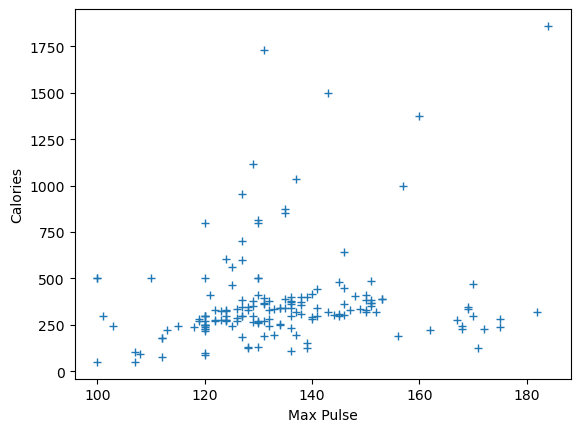

In [57]:
#Plot calories vs max pulse
plt.figure()

plt.plot(mpu_1, cal_1, marker = "+", linestyle = " ") #remember to remove the linestyle to avoid connecting the points

plt.xlabel("Max Pulse")
plt.ylabel("Calories")

plt.show() #we have two gropus: athletes (upper points) and people who don't excercise often (bundled points)

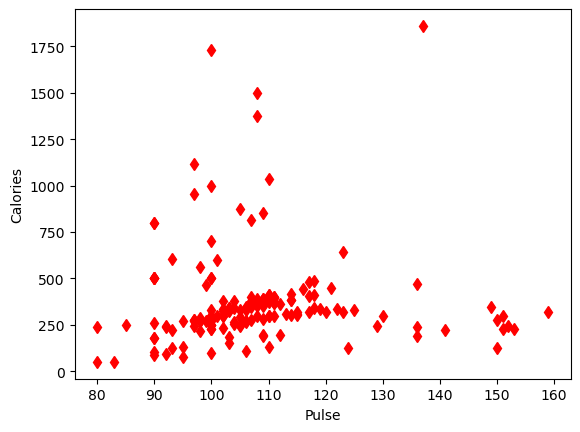

In [58]:
#Plot calories vs pulse
plt.figure()

plt.plot(pul_1, cal_1, marker = "d", linestyle = " ", color = "red")

plt.xlabel("Pulse")
plt.ylabel("Calories")

plt.show()

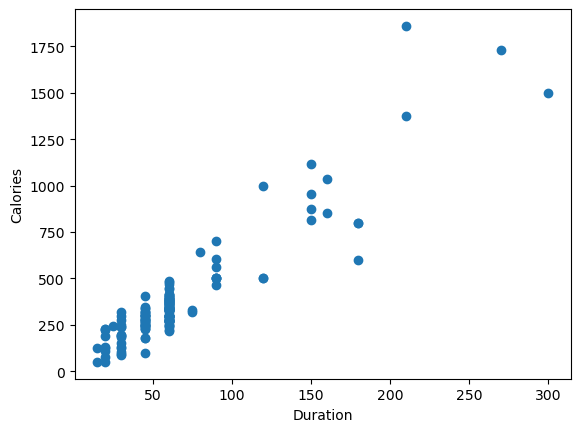

In [59]:
#Plot duration vs calories
plt.figure()

plt.plot(dur_1, cal_1, marker = "o", linestyle = " ")

plt.xlabel("Duration")
plt.ylabel("Calories")

plt.show() #for everyone, doing excercise burns calories, we see a linear relation